# EDA-Project: Netflix

Making EDA by file: ```"netflix_titles.csv"```


# 1) Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import os
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2) Let's read the file and get general information

In [2]:
netflix=pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
netflix.shape

(6234, 12)

In [4]:
netflix.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# 3) Exploratory data analysis

Let's find out what was released more, movies or TV shows

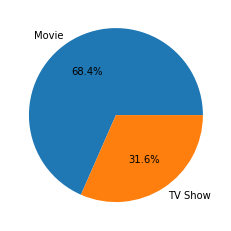

In [6]:
plt.pie(x=netflix["type"].value_counts(), labels=netflix["type"].value_counts().index, autopct=lambda x:f"{x:.1f}%");

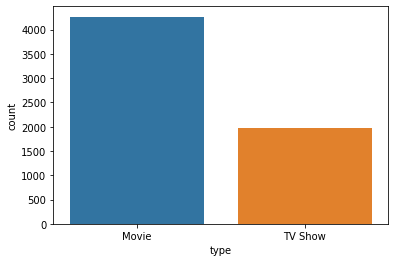

In [7]:
sns.countplot(x="type", data=netflix);

Let's look at the growth of projects since 2000

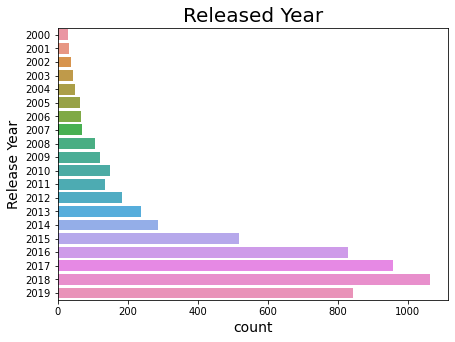

In [8]:
plt.figure(figsize = (7, 5))
sns.countplot(y="release_year", data=netflix[(netflix["release_year"]>=2000) & (netflix["release_year"]<2020)]);
plt.title('Released Year', fontsize = 20);
plt.ylabel('Release Year', fontsize = 14);
plt.xlabel('count', fontsize = 14);

How many TV shows have only the first season, and what time in minutes is the most popular among the duration of the films?

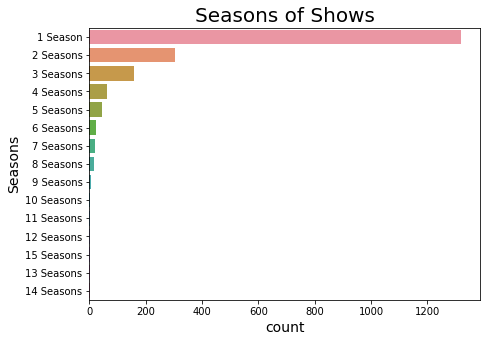

In [9]:
tv_show = netflix[netflix['type'] == 'TV Show']
plt.figure(figsize = (7, 5))
sns.countplot(y = 'duration', data = tv_show, order = tv_show['duration'].value_counts().head(25).index);
plt.title('Seasons of Shows', fontsize = 20);
plt.ylabel('Seasons', fontsize = 14);
plt.xlabel('count', fontsize = 14);

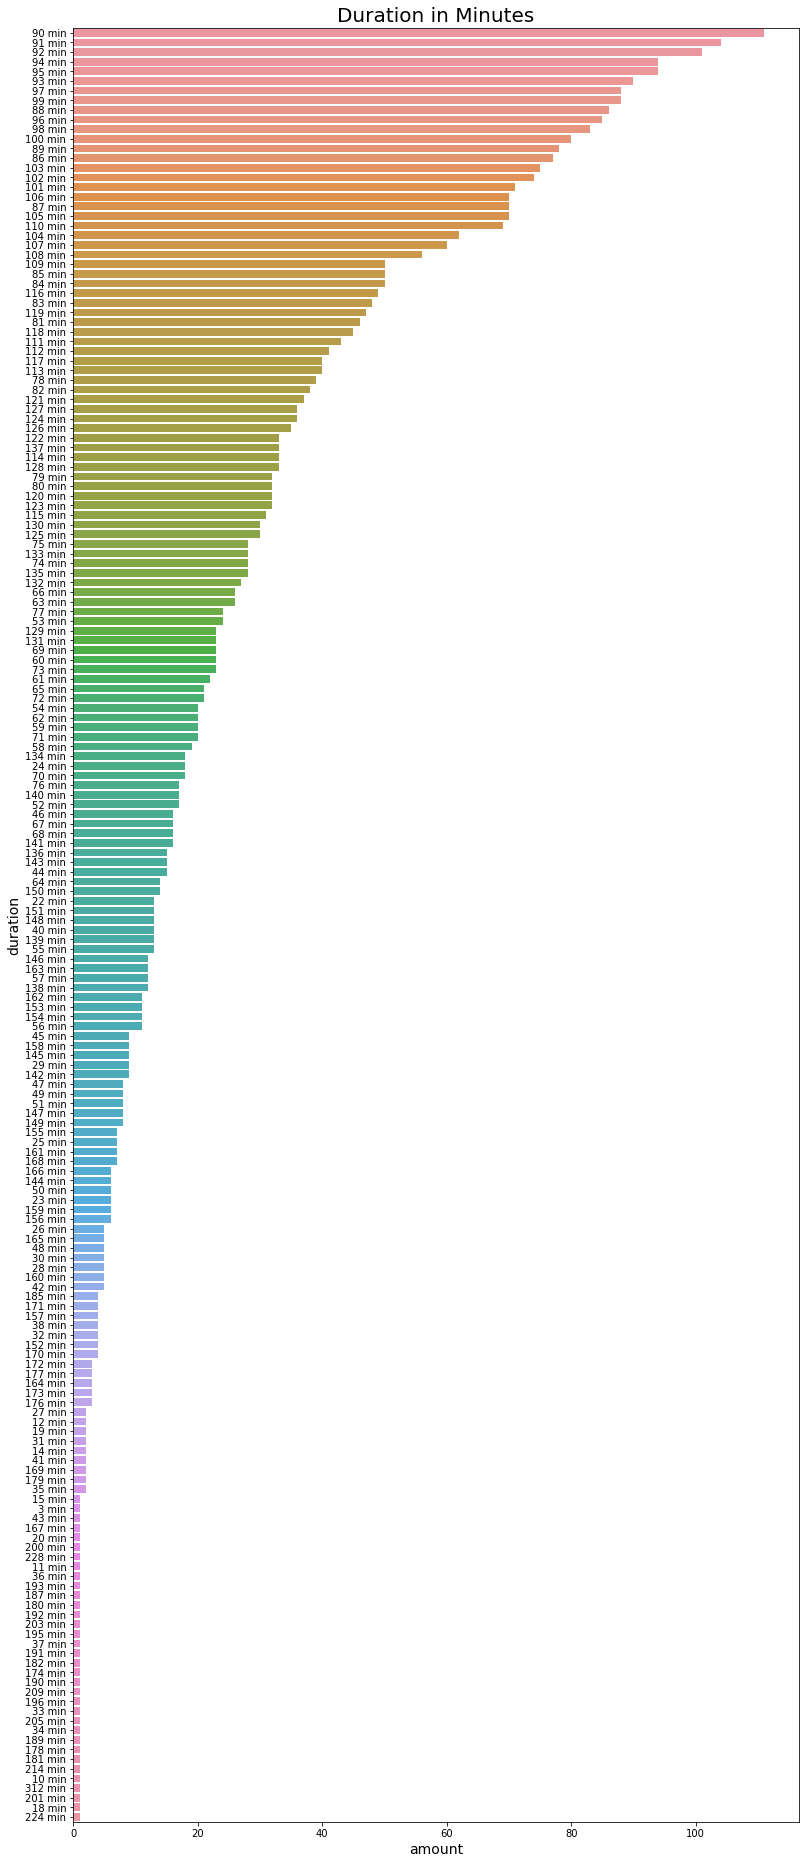

In [10]:
plt.figure(figsize = (13, 33))
movie = netflix[netflix['type'] == 'Movie']
sns.countplot(y = 'duration', data = movie, order = movie['duration'].value_counts().index);
plt.title('Duration in Minutes', fontsize = 20);
plt.ylabel('duration', fontsize = 14);
plt.xlabel('amount', fontsize = 14);

c:\users\user\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\user\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


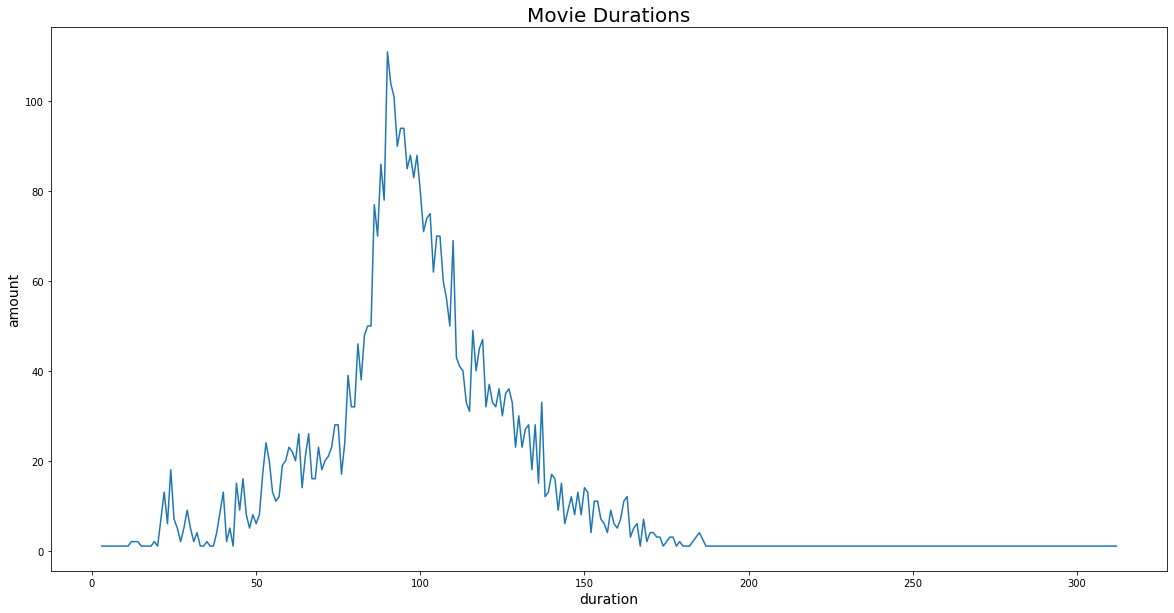

In [11]:
movie['duration'] = movie['duration'].str.strip(' min')
movie['duration'] = movie['duration'].astype(int)
movie_duration = movie['duration'].value_counts()

fig = plt.figure(figsize = (20,10));
sns.lineplot(data = movie_duration);
plt.title('Movie Durations', fontsize = 20);
plt.ylabel('amount', fontsize = 14);
plt.xlabel('duration', fontsize = 14);

How many countries work with Netflix?

In [12]:
netflix.isnull().sum()
netflix.dropna(inplace = True) 
netflix.shape

(3774, 12)

In [13]:
netflix['country_projects'] = netflix['country'].apply(lambda x :  x.replace(', ',',').replace(' ,','').split(','))

In [14]:
country_projects = {}
for i in netflix['country_projects']:
    for length in range(len(i)):
        if i[length] in country_projects:
            country_projects[i[length]]+=1
        else:
            country_projects[i[length]]=1

In [15]:
country_projects

{'United States': 1718,
 'India': 762,
 'South Korea': 52,
 'China': 79,
 'Bulgaria': 8,
 'Spain': 120,
 'Canada': 194,
 'Chile': 19,
 'United Kingdom': 341,
 'Denmark': 24,
 'Sweden': 19,
 'Netherlands': 25,
 'Belgium': 54,
 'France': 191,
 'Thailand': 36,
 'Pakistan': 20,
 'Turkey': 66,
 'Brazil': 40,
 'Italy': 40,
 'Indonesia': 49,
 'Hong Kong': 91,
 'Morocco': 5,
 'Vietnam': 4,
 'Argentina': 50,
 'Nigeria': 35,
 'Greece': 4,
 'Norway': 11,
 'Ireland': 21,
 'Switzerland': 13,
 'United Arab Emirates': 20,
 'Japan': 80,
 'Cambodia': 3,
 'Russia': 5,
 'Mexico': 78,
 'Israel': 15,
 'Germany': 113,
 'Australia': 67,
 'Portugal': 4,
 'Egypt': 44,
 'Taiwan': 12,
 'Austria': 7,
 'Soviet Union': 3,
 'Peru': 7,
 'Uruguay': 5,
 'Malaysia': 14,
 'South Africa': 23,
 'Nepal': 2,
 'Philippines': 45,
 'Poland': 21,
 'Serbia': 5,
 'Singapore': 17,
 'Luxembourg': 7,
 'Cayman Islands': 1,
 'New Zealand': 13,
 'Venezuela': 1,
 'Jordan': 4,
 'Saudi Arabia': 1,
 'Iceland': 5,
 '': 1,
 'West Germany': 2,

In [16]:
print(f'{len(country_projects)} countries work with Netflix')

96 countries work with Netflix


Which countries have made the most films and TV series?

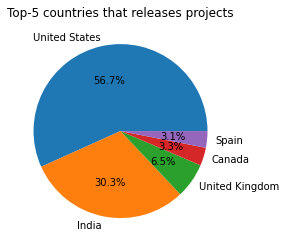

In [17]:
plt.pie(netflix["country"].value_counts()[:5], labels = netflix["country"].value_counts().index[:5], autopct=lambda x:f"{x:.1f}%");
plt.title("Top-5 countries that releases projects");

In [18]:
netflix["country"].value_counts()[:5]

United States     1323
India              707
United Kingdom     152
Canada              78
Spain               72
Name: country, dtype: int64

Which countries have made the most films?

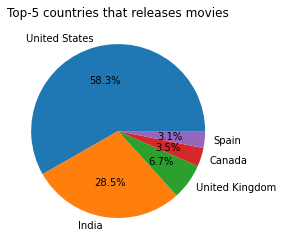

In [19]:
plt.pie(movie["country"].value_counts()[:5], labels = movie["country"].value_counts().index[:5], autopct=lambda x:f"{x:.1f}%");
plt.title("Top-5 countries that releases movies");

In [20]:
movie["country"].value_counts()[:5]

United States     1482
India              724
United Kingdom     170
Canada              88
Spain               80
Name: country, dtype: int64

Which countries have made the most TV series?

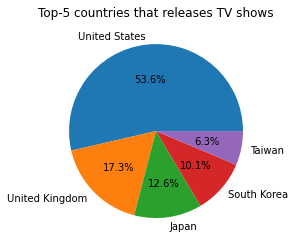

In [21]:
plt.pie(tv_show["country"].value_counts()[:5], labels = tv_show["country"].value_counts().index[:5], autopct=lambda x:f"{x:.1f}%");
plt.title("Top-5 countries that releases TV shows");

In [22]:
tv_show["country"].value_counts()[:5]

United States     550
United Kingdom    178
Japan             129
South Korea       104
Taiwan             65
Name: country, dtype: int64

How many directors have worked on projects?

In [23]:
netflix['directors'] = netflix['director'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

In [24]:
directors = {}
for i in netflix['directors']:
    for length in range(len(i)):
        if i[length] in directors:
            directors[i[length]]+=1
        else:
            directors[i[length]]=1

In [25]:
print(f"Amount of directors are {len(directors)}")

Amount of directors are 3202


In [26]:
directors

{'Richard Finn': 1,
 'Tim Maltby': 2,
 'Fernando Lebrija': 1,
 'Gabe Ibáñez': 1,
 'Rodrigo Toro': 1,
 'Francisco Schultz': 1,
 'Henrik Ruben Genz': 1,
 'Daniel Alfredson': 2,
 'Gaspar Noé': 1,
 "Tom O'Brien": 1,
 'Antoine Bardou-Jacquet': 1,
 'Brad Anderson': 2,
 'Austin Stark': 1,
 'Hannah Fidell': 1,
 'Sopon Sukdapisit': 1,
 'Kevin R. Adams': 1,
 'Joe Ksander': 1,
 'Ian Samuels': 1,
 'Franck Ribière': 1,
 'Daniele Thompson': 1,
 'Anubhav Sinha': 1,
 'Tharun Bhascker': 1,
 'Tom Gianas': 1,
 'Ross R. Shuman': 1,
 'Rajkumar Hirani': 3,
 'Robert Osman': 1,
 'Nathanael Wiseman': 1,
 'Jon Spira': 1,
 'Mez Tharatorn': 2,
 'Adisorn Tresirikasem': 1,
 'Banjong Pisanthanakun': 4,
 'Paween Purikitpanya': 1,
 'Songyos Sugmakanan': 1,
 'Parkpoom Wongpoom': 2,
 'Visute Poolvoralaks': 1,
 'Chayanop Boonprakob': 1,
 'Susan Johnson': 2,
 'Lynn Shelton': 3,
 'Farhan Alam': 1,
 'Chad Archibald': 1,
 'Brian Baugh': 1,
 'A. L. Vijay': 2,
 'Ryan Coogler': 1,
 'Ben Palmer': 1,
 'Chris Howe': 1,
 'Ken Kwapi

Which director has worked with projects more than others?

In [27]:
print(f"Director that worked more than others: {max(directors, key=directors.get)}, he worked with {directors[max(directors, key=directors.get)]} projects")

Director that worked more than others: Jan Suter, he worked with 21 projects


What is the largest gap between the release date and the addition of this project on Netflix and what is the name of this project

In [28]:
date_added = []
release_year = []

for i in netflix["date_added"]:
    date_added.append(int(i.split(",")[1]))
    
for j in netflix["release_year"]:
    release_year.append(j)

In [29]:
difference = np.array(date_added)-np.array(release_year)
print(f"The largest gap is {difference.max()}")

The largest gap is 75


In [30]:
difference_list = difference.tolist()
print(f"The project with the largest gap was released at {release_year[np.argmax(difference_list)]}")

The project with the largest gap was released at 1942


In [31]:
print(f"The project with the largest gap among the release and addition dates: {netflix[netflix['release_year']==release_year[np.argmax(difference_list)]]['title'].values[0]}")

The project with the largest gap among the release and addition dates: The Battle of Midway


What is the average interval between the release date and the addition date of all projects on Netflix

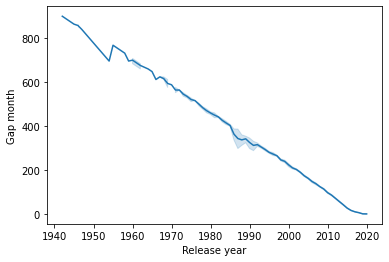

In [32]:
sns.lineplot(x=netflix["release_year"], y=difference*12);
plt.xlabel('Release year');
plt.ylabel('Gap month');

In [33]:
netflix.rating.unique()

array(['TV-PG', 'TV-14', 'R', 'TV-MA', 'NR', 'PG-13', 'PG', 'TV-Y7', 'G',
       'TV-G', 'UR', 'TV-Y7-FV', 'TV-Y', 'NC-17'], dtype=object)

In [34]:
netflix['genre'] = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

In [35]:
genre = {}
for i in netflix['genre']:
    for length in range(len(i)):
        if i[length] in genre:
            genre[i[length]]+=1
        else:
            genre[i[length]]=1

In [36]:
genre

{'Children & Family Movies': 322,
 'Comedies': 1058,
 'International Movies': 1722,
 'Sci-Fi & Fantasy': 185,
 'Thrillers': 382,
 'Stand-Up Comedy': 241,
 'Action & Adventure': 583,
 'Dramas': 1572,
 'Cult Movies': 54,
 'Independent Movies': 545,
 'Romantic Movies': 363,
 'Horror Movies': 254,
 'Documentaries': 306,
 'Music & Musicals': 193,
 'Faith & Spirituality': 41,
 'LGBTQ Movies': 51,
 'International TV Shows': 50,
 'TV Comedies': 17,
 'TV Dramas': 32,
 'Movies': 20,
 'British TV Shows': 17,
 'Crime TV Shows': 23,
 'Classic Movies': 76,
 'Sports Movies': 116,
 'Anime Features': 43,
 'TV Action & Adventure': 11,
 'Korean TV Shows': 10,
 'Romantic TV Shows': 12,
 'Docuseries': 9,
 'Spanish-Language TV Shows': 5,
 'Anime Series': 8,
 "Kids' TV": 10,
 'Stand-Up Comedy & Talk Shows': 8,
 'TV Mysteries': 4,
 'TV Shows': 4,
 'TV Thrillers': 3,
 'TV Horror': 4,
 'TV Sci-Fi & Fantasy': 5,
 'Teen TV Shows': 2,
 'Classic & Cult TV': 2,
 'Science & Nature TV': 1,
 'Reality TV': 1}

In [37]:
print(f'There are {len(genre)} genres')

There are 42 genres


In [38]:
print(f"The most popular genre is : {max(genre, key=genre.get)}, there are {genre[max(genre, key=genre.get)]} projects that have this genre")

The most popular genre is : International Movies, there are 1722 projects that have this genre
